In [1]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

2023-09-19 17:35:08.324771: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2023-09-19 17:35:09.835317: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-19 17:35:09.840140: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-19 17:35:09.840383: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


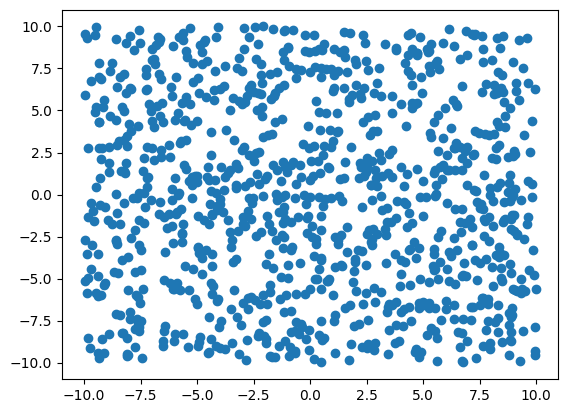

In [2]:
import numpy as np
def tested_function(z):
    return np.cos(np.angle(z)) + np.sin(np.abs(z)) + 2*np.imag(z)
data_size = 1000
data = np.random.uniform(-10, 10, data_size) + 1.j * np.random.uniform(-10, 10, data_size)

import matplotlib.pyplot as plt
plt.figure()
plt.scatter(np.real(data), np.imag(data))
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


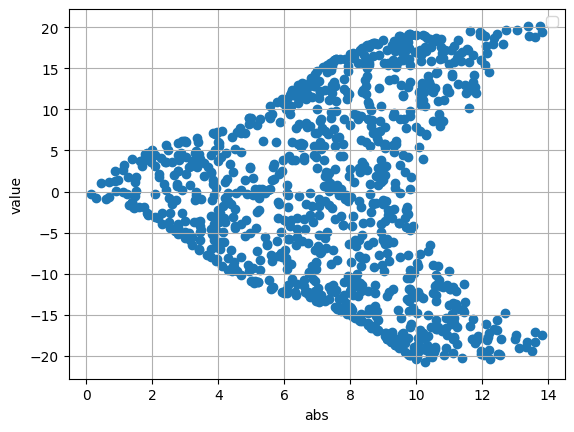

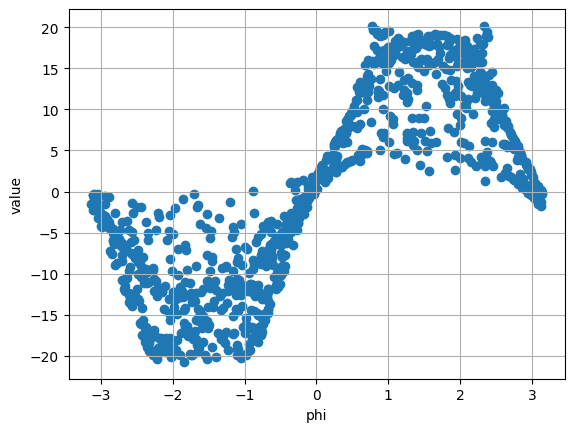

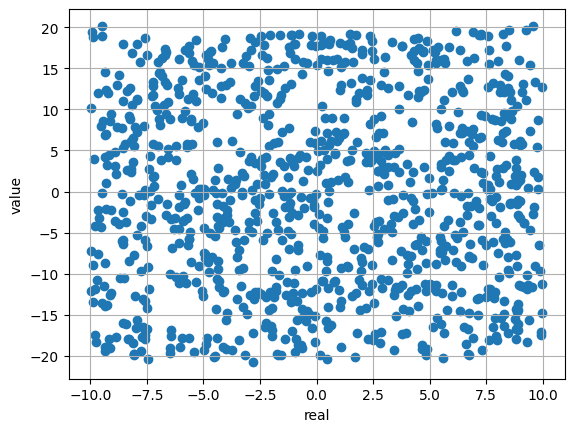

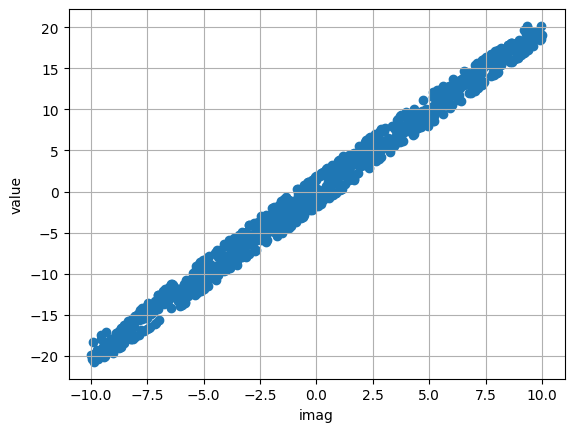

In [3]:
expected_output = tested_function(data)

plt.figure()
# plt.scatter(x_train, y_train, label='Dane treningowe', s=10)
# plt.plot(x_test, y_pred, color='red', linewidth=2, label='Predykcja')
plt.xlabel('abs')
plt.ylabel('value')
plt.legend()
plt.grid(True)
plt.scatter(np.abs(data), expected_output)
plt.show()

plt.figure()
plt.xlabel('phi')
plt.ylabel('value')
plt.grid(True)
plt.scatter(np.angle(data), expected_output)
plt.show()

plt.figure()
plt.xlabel('real')
plt.ylabel('value')
plt.grid(True)
plt.scatter(np.real(data), expected_output)
plt.show()

plt.figure()
plt.xlabel('imag')
plt.ylabel('value')
plt.grid(True)
plt.scatter(np.imag(data), expected_output)
plt.show()

In [43]:
# train_data, test_data = tf.keras.utils.split_dataset(data, left_size=0.8)
rvnn_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

rvnn_model.compile(optimizer='adam', loss='mean_squared_error')
rvnn_model.summary()

Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 64)                192       
                                                                 
 dense_18 (Dense)            (None, 1)                 65        
                                                                 
Total params: 257 (1.00 KB)
Trainable params: 257 (1.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
example_batch = data[:10]
print(example_batch)
example_input = [(np.real(z), np.imag(z)) for z in example_batch]
print(example_input)
rvnn_model.predict(example_input)

[-0.05608697-9.23645954j  0.18836557+9.51423299j -0.16718985-0.57259524j
 -2.5077516 -0.19485204j -6.48804257+4.32415954j  0.3878919 +4.92048328j
  8.96478464+7.89592316j -8.51583309-4.6758896j  -9.51952374+4.93246534j
  4.52615954+8.67785908j]
[(-0.05608696681305503, -9.236459537192234), (0.1883655685301644, 9.514232991407237), (-0.1671898546030839, -0.5725952408632207), (-2.507751603614963, -0.19485203768161696), (-6.48804256682328, 4.32415954377565), (0.3878918991107554, 4.920483280649297), (8.964784640414809, 7.8959231637327285), (-8.515833086814267, -4.675889599267828), (-9.519523741050854, 4.932465339637906), (4.5261595356782625, 8.677859082230718)]
1/1 [==============================] - 0s 40ms/step


array([[ 3.732875  ],
       [-2.3586106 ],
       [ 0.17666446],
       [-0.45216072],
       [-2.0460389 ],
       [-1.2157713 ],
       [-1.0763949 ],
       [-0.17822349],
       [-2.6918838 ],
       [-1.8261952 ]], dtype=float32)

In [44]:
input2D = [(np.real(z), np.imag(z)) for z in data]
rvnn_history = rvnn_model.fit(np.array(input2D), expected_output, epochs=300, validation_split=0.2, verbose=1)

Epoch 1/300
25/25 [==============================] - 1s 8ms/step - loss: 122.2413 - val_loss: 118.4541
Epoch 2/300
25/25 [==============================] - 0s 6ms/step - loss: 95.8700 - val_loss: 91.2312
Epoch 3/300
25/25 [==============================] - 0s 4ms/step - loss: 72.0994 - val_loss: 67.1471
Epoch 4/300
25/25 [==============================] - 0s 4ms/step - loss: 51.2866 - val_loss: 45.6188
Epoch 5/300
25/25 [==============================] - 0s 4ms/step - loss: 33.3223 - val_loss: 28.1659
Epoch 6/300
25/25 [==============================] - 0s 4ms/step - loss: 19.4074 - val_loss: 15.3507
Epoch 7/300
25/25 [==============================] - 0s 4ms/step - loss: 9.8748 - val_loss: 7.3142
Epoch 8/300
25/25 [==============================] - 0s 4ms/step - loss: 4.4732 - val_loss: 3.1154
Epoch 9/300
25/25 [==============================] - 0s 4ms/step - loss: 1.9471 - val_loss: 1.4153
Epoch 10/300
25/25 [==============================] - 0s 4ms/step - loss: 1.0249 - val_loss: 0.

val_loss 0.4695179760456085


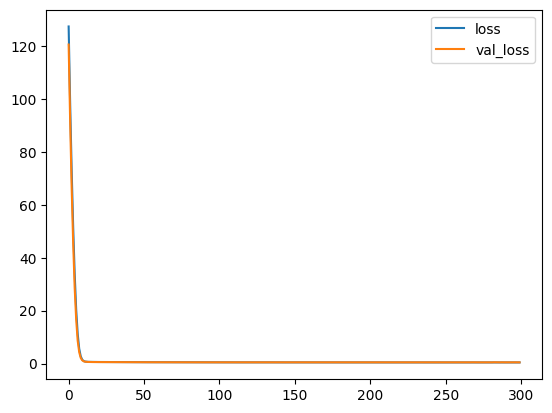

In [15]:
import pandas as pd
df = pd.DataFrame(rvnn_history.history)
df['epoch'] = rvnn_history.epoch

plt.figure()
# plt.title(activation_function)
plt.plot(df['epoch'], df['loss'], label='loss')
plt.plot(df['epoch'], df['val_loss'], label='val_loss')
plt.legend()
plt.plot()
print('val_loss', df['val_loss'].tail(1).values[0])

In [23]:
import cvnn.layers as complex_layers

complex_to_real = ['cast_to_real', 'sigmoid_real', 'softmax_real_with_abs', 'softmax_real_with_avg', 'softmax_real_with_mult', 'softmax_of_softmax_real_with_mult', 'softmax_of_softmax_real_with_avg', 'convert_to_real_with_abs', 'softmax_real_with_polar']

cvnn_history = []
for activation_function in complex_to_real:
    print(activation_function)
    cvnn_model = tf.keras.Sequential([
        complex_layers.ComplexInput(input_shape=(1,)),
        complex_layers.ComplexDense(48, activation='complex_cardioid'),
        complex_layers.ComplexDense(1, activation=activation_function)
        # tf.keras.layers.Dense(1)
        # complex_layers.ComplexDense(1, activation='linear')
    ])

    cvnn_model.compile(optimizer='adam', loss='mean_squared_error')
    cvnn_history.append(cvnn_model.fit(np.array(data), expected_output, epochs=300, validation_split=0.2, verbose=0))

cast_to_real
sigmoid_real
softmax_real_with_abs
softmax_real_with_avg
softmax_real_with_mult
softmax_of_softmax_real_with_mult
softmax_of_softmax_real_with_avg
convert_to_real_with_abs
softmax_real_with_polar


val_loss 0.6359142065048218
val_loss 129.4477996826172
val_loss 141.0556182861328
val_loss 141.0556182861328
val_loss 141.0556182861328
val_loss 141.0556182861328
val_loss 141.0556182861328
val_loss 71.5632095336914
val_loss 141.0556182861328


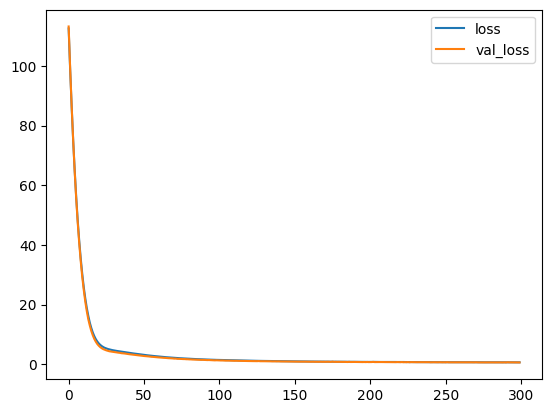

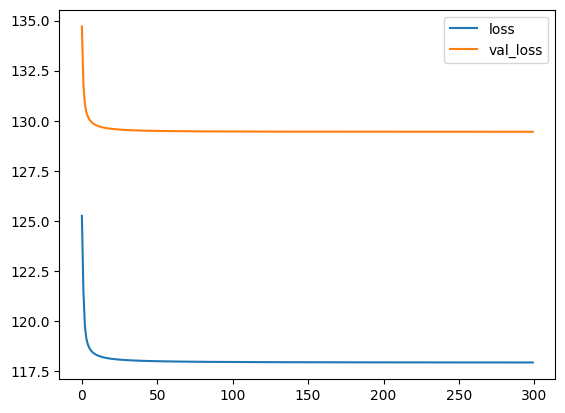

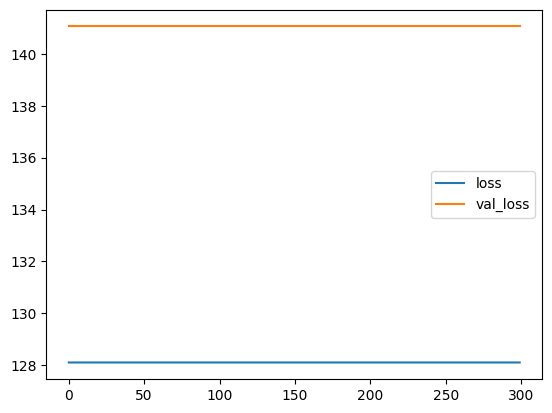

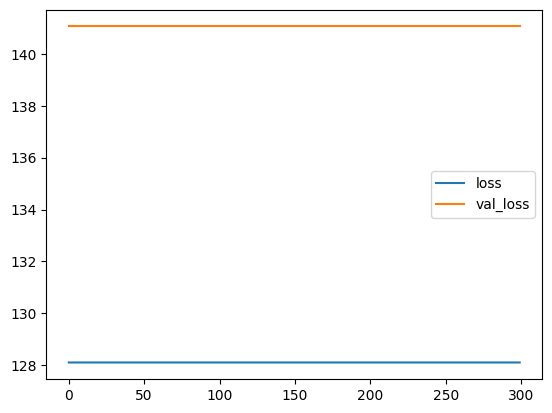

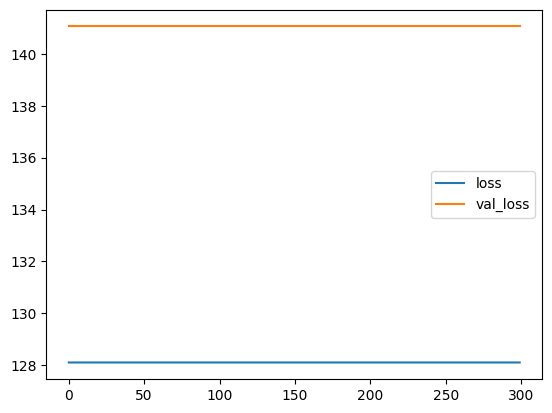

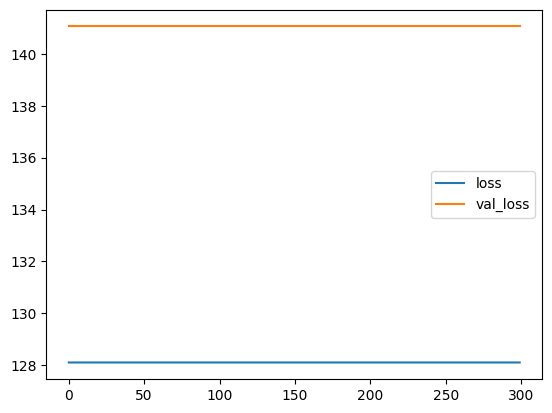

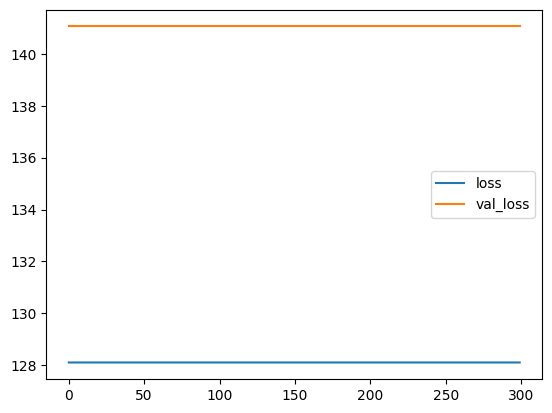

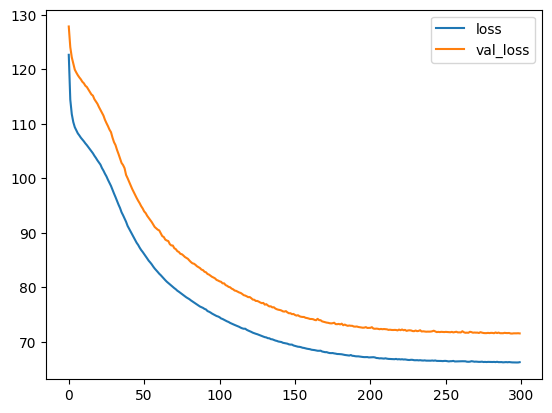

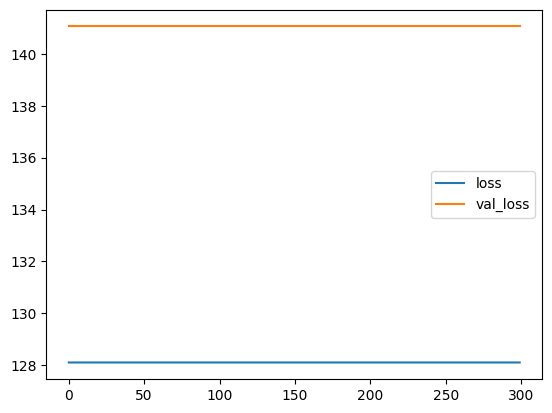

In [25]:
for history in cvnn_history:
    df = pd.DataFrame(history.history)
    df['epoch'] = history.epoch

    plt.figure()
    # plt.title(activation_function)
    plt.plot(df['epoch'], df['loss'], label='loss')
    plt.plot(df['epoch'], df['val_loss'], label='val_loss')
    plt.legend()
    plt.plot()
    print('val_loss', df['val_loss'].tail(1).values[0])

## spacer

In [45]:

cvnn_model = tf.keras.models.Sequential()
cvnn_model.add(complex_layers.ComplexInput(input_shape=(1,)))
cvnn_model.add(complex_layers.ComplexDense(units=42, activation='complex_cardioid'))
cvnn_model.add(complex_layers.ComplexDense(units=1, activation='cast_to_real'))
cvnn_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error', 'mean_absolute_percentage_error'])
cvnn_model.summary()
cvnn_history = cvnn_model.fit(np.array(data), expected_output, epochs=500, validation_split=0.2, verbose=1)

Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 complex_dense_76 (ComplexD  (None, 42)                168       
 ense)                                                           
                                                                 
 complex_dense_77 (ComplexD  (None, 1)                 86        
 ense)                                                           
                                                                 
Total params: 254 (1016.00 Byte)
Trainable params: 254 (1016.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/500
25/25 [==============================] - 1s 10ms/step - loss: 168.8587 - mean_absolute_error: 10.9087 - mean_absolute_percentage_error: 137.8326 - val_loss: 151.6242 - val_mean_absolute_error: 10.7006 - val_mean_absolute_percentage_error: 115.1611
Epoch 2/500
25/25

In [40]:
df = pd.DataFrame(cvnn_history.history)
df['epoch'] = cvnn_history.epoch
df

,loss,mean_absolute_error,mean_absolute_percentage_error,val_loss,val_mean_absolute_error,val_mean_absolute_percentage_error,epoch
0,19.493511,2.389561,52.172676,0.694229,0.692712,19.756063,0
1,0.751797,0.718444,35.092567,0.715557,0.693312,19.183647,1
2,0.712988,0.715993,36.170631,0.719229,0.707067,18.450354,2
3,0.674734,0.696562,34.341690,0.692751,0.706461,20.744579,3
4,0.805370,0.737898,34.954720,0.625064,0.669118,17.921822,4
...,...,...,...,...,...,...,...
495,0.529730,0.623093,30.716841,0.525171,0.632896,15.870152,495
496,0.539261,0.627231,31.222342,0.603991,0.653289,15.624443,496
497,0.543948,0.631673,30.023497,0.565152,0.653866,15.514282,497
498,0.527454,0.628582,29.026291,0.538090,0.644417,14.888241,498


[]

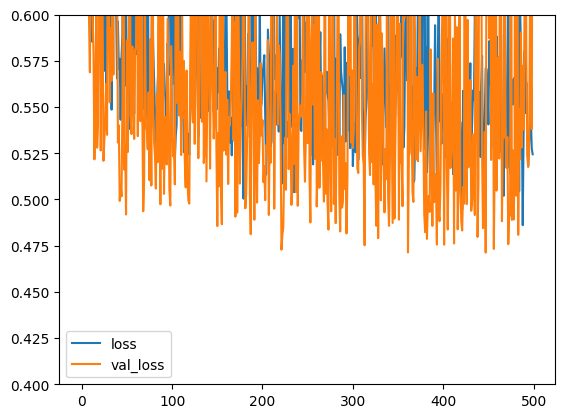

In [41]:
plt.figure()
plt.ylim((0.4, 0.6))
plt.plot(df['epoch'], df['loss'], label='loss')
plt.plot(df['epoch'], df['val_loss'], label='val_loss')
plt.legend()
plt.plot()